In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv("Social_Network_Ads.csv")

In [299]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [300]:

from sklearn.model_selection import train_test_split
# iloc is used to select the columns by their index
# :-1 is used to select all the columns except the last one
# :,-1 is used to select the last column
# test_size is used to split the data into training and testing sets
# random_state is used to ensure that the same data is used for training and testing
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=2)

X_train.shape,y_test.shape,y_train.shape,y_test.shape


((280, 2), (120,), (280,), (120,))

In [302]:
from sklearn.preprocessing import StandardScaler
# standard scalar will do standarization Xi` = (Xi - X) / (Standard deviation)  
scaler = StandardScaler()

scaler.fit(X_train)

# Transform the training and test feature sets using the fitted scaler
# This standardizes the features by removing the mean and scaling to unit variance
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [303]:
print(X_train_scaled)

[[ 0.02273414 -0.26389006]
 [ 0.79431698 -1.42026223]
 [-0.26660943 -0.38249233]
 [ 0.89076483  1.2779395 ]
 [ 0.3120777  -0.20458892]
 [-0.26660943 -0.59004631]
 [-0.26660943 -1.42026223]
 [ 1.46945196 -1.06445541]
 [-0.07371372  0.12156733]
 [-0.84529656 -0.67899802]
 [-0.07371372  0.00296506]
 [-0.26660943  0.09191676]
 [ 0.21562985 -0.3231912 ]
 [-0.26660943  0.26982017]
 [ 0.11918199  0.03261563]
 [ 1.95169124  2.19710712]
 [-1.03819227 -1.47956337]
 [ 0.3120777   0.29947074]
 [ 2.04813909 -1.21270825]
 [-1.13464012 -0.53074518]
 [ 0.21562985  0.1512179 ]
 [-0.26660943 -0.94585313]
 [-0.65240085  0.03261563]
 [ 0.21562985  0.06226619]
 [ 0.40852556 -0.14528779]
 [-1.13464012 -1.12375655]
 [-0.07371372  2.25640826]
 [ 1.08366054 -0.14528779]
 [ 0.89076483  1.04073495]
 [-0.07371372  0.26982017]
 [-0.55595299 -1.5388645 ]
 [-1.13464012 -1.03480484]
 [-0.7488487   1.36689121]
 [ 1.08366054  0.56632586]
 [ 1.56589982 -1.30165996]
 [ 0.69786912 -1.42026223]
 [-0.65240085 -1.06445541]
 

In [305]:
scaler.mean_


array([3.77642857e+01, 6.99000000e+04])

In [306]:
X_train

,Age,EstimatedSalary
112,38,61000
209,46,22000
294,35,57000
307,47,113000
345,41,63000
...,...,...
299,46,117000
22,48,41000
72,20,23000
15,29,80000


In [307]:
X_train_scaled

array([[ 0.02273414, -0.26389006],
       [ 0.79431698, -1.42026223],
       [-0.26660943, -0.38249233],
       [ 0.89076483,  1.2779395 ],
       [ 0.3120777 , -0.20458892],
       [-0.26660943, -0.59004631],
       [-0.26660943, -1.42026223],
       [ 1.46945196, -1.06445541],
       [-0.07371372,  0.12156733],
       [-0.84529656, -0.67899802],
       [-0.07371372,  0.00296506],
       [-0.26660943,  0.09191676],
       [ 0.21562985, -0.3231912 ],
       [-0.26660943,  0.26982017],
       [ 0.11918199,  0.03261563],
       [ 1.95169124,  2.19710712],
       [-1.03819227, -1.47956337],
       [ 0.3120777 ,  0.29947074],
       [ 2.04813909, -1.21270825],
       [-1.13464012, -0.53074518],
       [ 0.21562985,  0.1512179 ],
       [-0.26660943, -0.94585313],
       [-0.65240085,  0.03261563],
       [ 0.21562985,  0.06226619],
       [ 0.40852556, -0.14528779],
       [-1.13464012, -1.12375655],
       [-0.07371372,  2.25640826],
       [ 1.08366054, -0.14528779],
       [ 0.89076483,

<h3>Since after transform dataframe converted to numpy array so we need to convert it back to dataframe </h3>

In [309]:
X_train_scaled =pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [311]:
X_train_scaled

,Age,EstimatedSalary
0,0.022734,-0.263890
1,0.794317,-1.420262
2,-0.266609,-0.382492
3,0.890765,1.277940
4,0.312078,-0.204589
...,...,...
275,0.794317,1.396542
276,0.987213,-0.856901
277,-1.713327,-1.390612
278,-0.845297,0.299471


In [312]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.8,69900.0
std,10.4,33786.6
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,70500.0
75%,46.0,87000.0
max,60.0,150000.0


In [313]:
np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


Text(0.5, 1.0, 'Scatter Plot of Age and Estimated Salary Before Scaling')

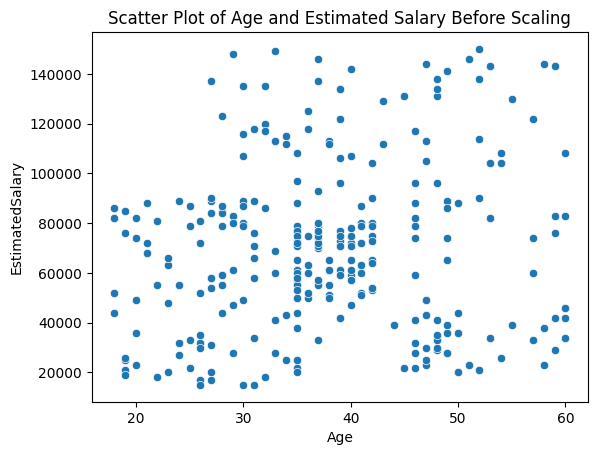

In [315]:
my_plot = sns.scatterplot(x="Age",y="EstimatedSalary",data=X_train)
my_plot.set_title("Scatter Plot of Age and Estimated Salary Before Scaling")

Text(0.5, 1.0, 'Scatter Plot of Age and Estimated Salary After Scaling')

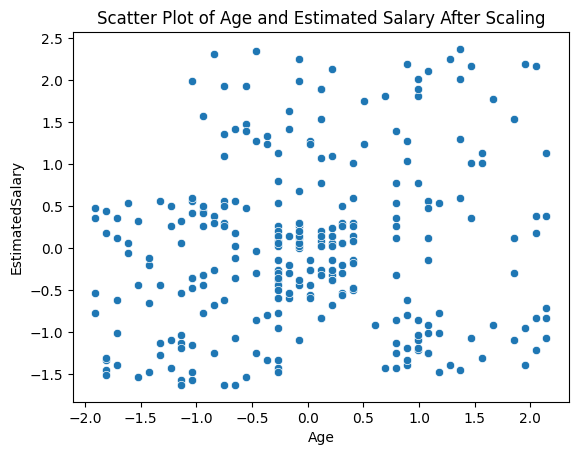

In [316]:

my_plot = sns.scatterplot(x="Age",y="EstimatedSalary",data=X_train_scaled)
my_plot.set_title("Scatter Plot of Age and Estimated Salary After Scaling")


<Axes: xlabel='Age', ylabel='Density'>

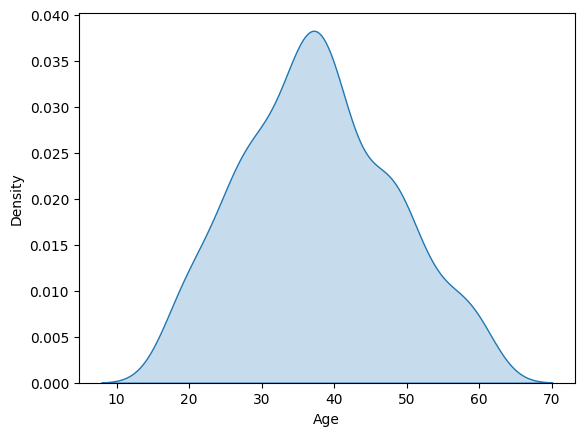

In [317]:
# probability distribution fiunction of age and estimated sallary 
# before and after scaling

sns.kdeplot(data=X_train, x="Age", fill=True, common_norm=False, label="Age Before Scaling")

<Axes: xlabel='Age', ylabel='Density'>

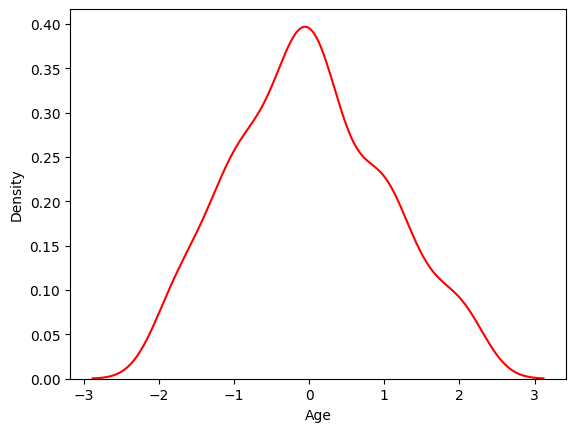

In [318]:
sns.kdeplot(X_train_scaled["Age"],color="Red")

# WHY SCALING IS IMPORTANT


In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [321]:
# Fit the model on the training data
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [322]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)



In [323]:
from sklearn.metrics import accuracy_score


In [325]:

print("Actual",accuracy_score(y_test,y_pred)*100)
print("Scaled",accuracy_score(y_test,y_pred_scaled)*100)


Actual 84.16666666666667
Scaled 84.16666666666667
